In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import datetime 
import statsmodels.api as sm
from scipy import stats

In [2]:
df_ventes = pd.read_csv('df_ventes_nettoyees.csv')

In [3]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

# Mission n°2 : Analyse des données

## Indicateur de tendance centrale

In [4]:
#mediane
print('le prix median est de {}'.format(df_ventes['price'].median()), '€')

#moyenne
print('le prix moyen est de {:.3f}'.format(df_ventes['price'].mean()), '€')

le prix median est de 13.99 €
le prix moyen est de 17.372 €


## Indicateur de dispersion

In [5]:
#variance empirique corrigee
print('la variance empirique corrigee est de {}'.format(df_ventes['price'].var(ddof=0)), '\n')

#écart-type empirique
print('l écart-type empirique {}'.format(df_ventes['price'].std()), '\n')

#coefficient de variation - écart type empirique divisé par la moyenne
print('coefficient de variation {}'.format(df_ventes['price'].std()/df_ventes['price'].mean()))

la variance empirique corrigee est de 318.50117065022636 

l écart-type empirique 17.846628989094995 

coefficient de variation 1.0273226812603795


## Analyse de concentration, via une courbe de Lorenz et un indice de Gini

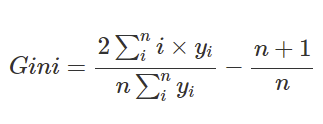

In [6]:
from IPython.display import Image
Image('formule_Gini.png', width=400, height=400)

In [7]:
def formule_Gini(array):
    n = array.size
    #n = len(array)
    #dans la formule ça commence de i à n, donc ça va du plus petit au plus grand
    sorted_array = array.sort()
    a = sum((i+1)*yi for i, yi in enumerate (sorted_array))
    b = sum(yi for yi in enumerate(sorted_array))
    return (2*a)/(n*b)-((n+1)/n)

### Courbe de Lorenz sur le prix

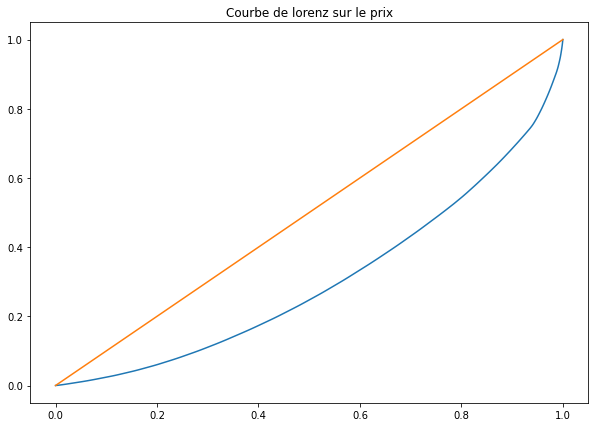

<Figure size 432x288 with 0 Axes>

In [8]:
#reprise de la courbe de lorenz du cours d'OC
#création de la variable dépenses

depenses = df_ventes['price']
depenses = df_ventes['price'].values
n = len(depenses)

#il faut trier les individus dans l'ordre croissant des valeurs de la variable
#Pour normaliser et faire en sorte que le haut de la courbe soit à 1, 
#on divise le tout par dep.sum()
lorenz = np.cumsum(np.sort(depenses))/depenses.sum() 

lorenz = np.append([0],lorenz) #la courbe de lorenz commence à 0

xaxis = np.linspace(0-1/n, 1+1/n,len(lorenz))
fig = plt.figure(figsize =(10, 7))
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1]) #tracer la bisséctrice
plt.title("Courbe de lorenz sur le prix")
plt.show()

plt.savefig('courbe_lorenz_prix.png')

## Courbe de lorenz sur l'âge

#### Création de la colonne age

In [9]:
currentDate = datetime.date.today()
df_ventes['age'] = currentDate.year - df_ventes['birth']
df_ventes.head(1)

,Unnamed: 0,id_prod,date,session_id,client_id,mois,annee,jour,sex,birth,_merge,price,categ,_merge2,age
0,0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.0,2021.0,10.0,f,1977.0,both,4.99,0.0,both,45.0


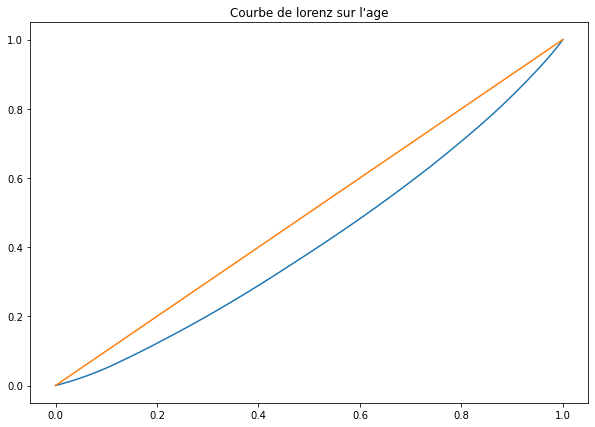

<Figure size 432x288 with 0 Axes>

In [10]:
#reprise de la courbe de lorenz du cours d'OC
#création de la variable dépenses

age_lorenz = df_ventes['age']
age_lorenz = df_ventes['age'].values
n = len(depenses)

#il faut trier les individus dans l'ordre croissant des valeurs de la variable
#Pour normaliser et faire en sorte que le haut de la courbe soit à 1, 
#on divise le tout par dep.sum()
lorenz_age = np.cumsum(np.sort(age_lorenz))/age_lorenz.sum() 

lorenz_age = np.append([0],lorenz_age) #la courbe de lorenz commence à 0

xaxis = np.linspace(0-1/n, 1+1/n,len(lorenz))
fig = plt.figure(figsize =(10, 7))
plt.plot(xaxis,lorenz_age,drawstyle='steps-post')
plt.plot([0,1], [0,1]) #tracer la bisséctrice
plt.title("Courbe de lorenz sur l'age")
plt.show()

plt.savefig('courbe_lorenz_age.png')

### Indice de Gini

In [11]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n #Surface sous la courbe de Lorenz. 
#Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.3897866190296627

#### Indice de Gini sur lorenz_age

In [12]:
AUC = (lorenz_age.sum() -lorenz_age[-1]/2 -lorenz_age[0]/2)/n #Surface sous la courbe de Lorenz. 
#Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.17011324843726283

## On fait un histogramme de la distribution des prix

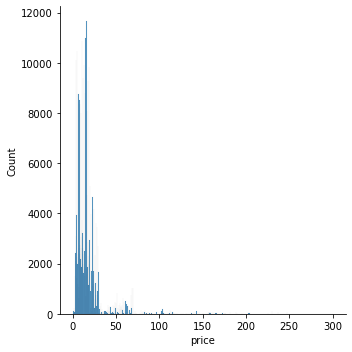

In [13]:
sns.displot(df_ventes['price'])

In [14]:
df_ventes.price.skew()

5.471961035482637

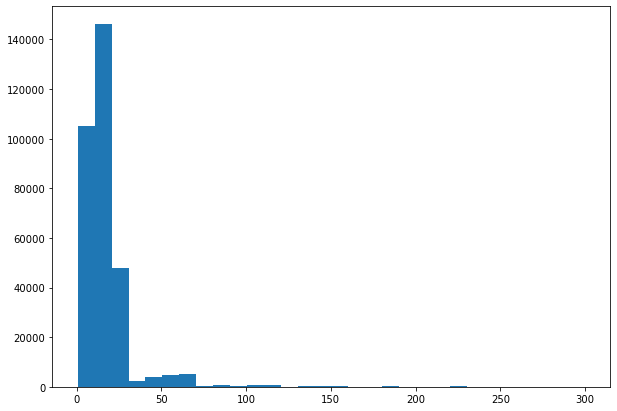

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize =(10, 7))
plt.hist(df_ventes['price'], bins=30)
plt.show()

plt.savefig('histogramme_distribution_des_prix.png')

## Une boite à moustache sur la distribution des prix

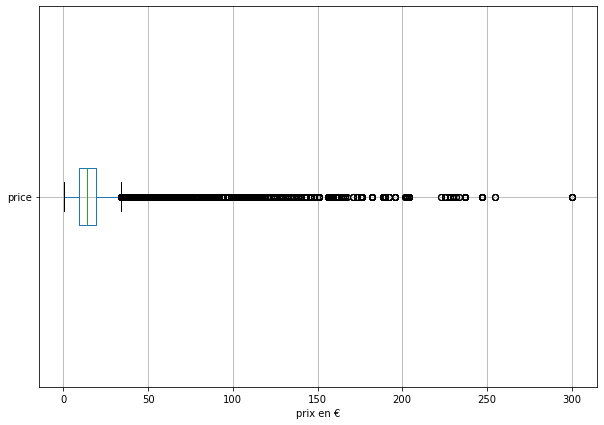

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize =(10, 7))
boxplot = df_ventes.boxplot(column=['price'], vert=False)
plt.xlabel('prix en €')
plt.show()


plt.savefig('boite_a_moustache_distribution_des_prix.png')

## Représentation de série temporelle (c’est-à-dire un graphique dont l’axe des abscisses représente des dates)

### Time Series du chiffre d'affaire

In [17]:
df_ventes['date']=pd.to_datetime(df_ventes['date'], format='%Y-%m-%d %H:%M:%S.%f')
df_ventes['mois'] = df_ventes['date'].dt.month
df_ventes['annee'] = df_ventes['date'].dt.year
df_ventes.sort_values(by='date')
df_ventes

,Unnamed: 0,id_prod,date,session_id,client_id,mois,annee,jour,sex,birth,_merge,price,categ,_merge2,age
0,0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4,2021,10.0,f,1977.0,both,4.99,0.0,both,45.0
1,1,0_1483,2021-12-27 11:11:12.123067,s_140787,c_5433,12,2021,27.0,f,1981.0,both,4.99,0.0,both,41.0
2,2,0_1483,2021-07-04 06:43:45.676567,s_57626,c_3679,7,2021,4.0,f,1989.0,both,4.99,0.0,both,33.0
3,3,0_1483,2021-09-19 08:45:43.735331,s_92165,c_1609,9,2021,19.0,m,1980.0,both,4.99,0.0,both,42.0
4,4,0_1483,2021-07-22 20:45:15.286364,s_65805,c_1609,7,2021,22.0,m,1980.0,both,4.99,0.0,both,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319897,319993,2_24,2021-03-21 02:54:28.780319,s_9261,c_6941,3,2021,21.0,m,2000.0,both,96.88,2.0,both,22.0
319898,319994,2_28,2021-05-11 01:31:34.932056,s_32812,c_7613,5,2021,11.0,f,1993.0,both,103.50,2.0,both,29.0
319899,319995,0_808,2022-02-07 03:27:52.959872,s_161186,c_5121,2,2022,7.0,m,1990.0,both,27.85,0.0,both,32.0
319900,319996,0_1735,2021-06-09 09:52:48.804343,s_46204,c_7980,6,2021,9.0,f,1980.0,both,26.99,0.0,both,42.0


In [18]:
chiffre_affaire = df_ventes[['annee', 'mois','price']].groupby(['annee', 'mois']).agg(['sum']).reset_index()
chiffre_affaire['mois-annee'] = chiffre_affaire[['mois', 'annee']].astype(str).agg('-'.join, axis=1).copy()
chiffre_affaire

,annee,mois,price,mois-annee
,,,sum,
0,2021,3,479312.03,3-2021
1,2021,4,472980.72,4-2021
2,2021,5,489367.95,5-2021
3,2021,6,481257.94,6-2021
4,2021,7,480898.66,7-2021
5,2021,8,479305.19,8-2021
6,2021,9,502771.28,9-2021
7,2021,10,79913.31,10-2021
8,2021,11,512890.17,11-2021


In [19]:
chiffre_affaire = chiffre_affaire.loc[~(chiffre_affaire['mois']==10), :]

On a supprimé dans notre nettoyage les jours du mois d'octobre à qui il manquait des données.
Pour ne pas fausser le graphe du chiffre d'affaire, nous choisissons de supprimer le mois d'octobre
dans la représenation

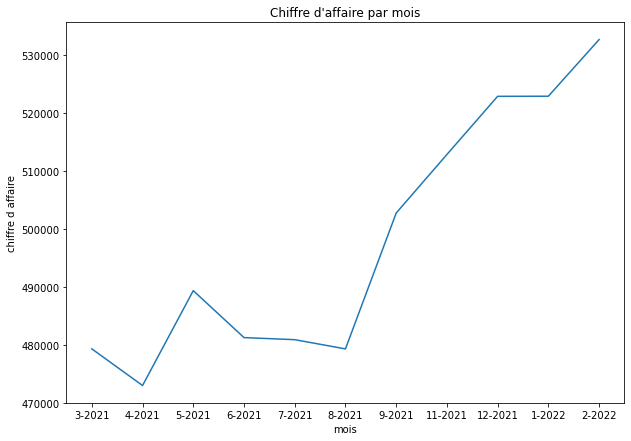

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize=(10,7))
plt.axes()
plt.plot(chiffre_affaire['mois-annee'], chiffre_affaire['price']['sum'])
plt.title("Chiffre d'affaire par mois")
plt.xlabel('mois')
plt.ylabel('chiffre d affaire')
plt.show()


plt.savefig('chiffre_affaire_par_mois.png')

## Chiffre d'affaire moyenne mobile

In [21]:
CA_3_derniers_mois = []
moyenne_mobile_tableau = []
CA_tempo = []
for i, row in chiffre_affaire.iterrows():
    print(moyenne_mobile_tableau)
    if i<1:
        CA_tempo.append(row['price']['sum'])
        CA_3_derniers_mois = CA_tempo
            
    if 1<=i<2:
        CA_tempo.append(row['price']['sum'])
        CA_3_derniers_mois = CA_tempo[i-1:i]
          
    else:
        CA_tempo.append(row['price']['sum'])
        CA_3_derniers_mois = CA_tempo[i-2:i]
        
    moyenne_mobile = np.mean(CA_3_derniers_mois)
    moyenne_mobile_tableau.append(moyenne_mobile)    
    
chiffre_affaire['moyenne_mobile_CA'] = moyenne_mobile_tableau

[]
[nan]
[nan, 479312.02999999997]
[nan, 479312.02999999997, 479312.02999999997]
[nan, 479312.02999999997, 479312.02999999997, 476146.375]
[nan, 479312.02999999997, 479312.02999999997, 476146.375, 481174.33499999996]
[nan, 479312.02999999997, 479312.02999999997, 476146.375, 481174.33499999996, 485312.945]
[nan, 479312.02999999997, 479312.02999999997, 476146.375, 481174.33499999996, 485312.945, 481078.3]
[nan, 479312.02999999997, 479312.02999999997, 476146.375, 481174.33499999996, 485312.945, 481078.3, 491038.235]
[nan, 479312.02999999997, 479312.02999999997, 476146.375, 481174.33499999996, 485312.945, 481078.3, 491038.235, 507830.725]
[nan, 479312.02999999997, 479312.02999999997, 476146.375, 481174.33499999996, 485312.945, 481078.3, 491038.235, 507830.725, 517913.925]


C:\Users\jb-14\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\jb-14\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\jb-14\AppData\Local\Temp/ipykernel_16284/1364443099.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chiffre_affaire['moyenne_mobile_CA'] = moyenne_mobile_tableau


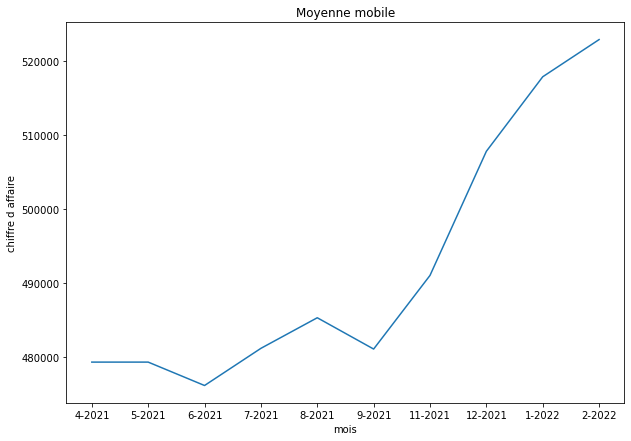

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(10,7))
plt.axes()
plt.plot(chiffre_affaire['mois-annee'], chiffre_affaire['moyenne_mobile_CA'])
plt.title('Moyenne mobile')
plt.xlabel('mois')
plt.ylabel('chiffre d affaire')
plt.show()

plt.savefig('moyenne_mobile.png')

## Analyse bivariées

### Nettoyage extra

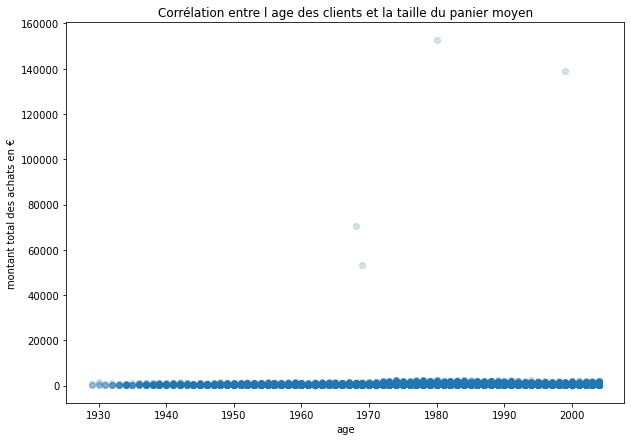

In [23]:
df_ventes_tempo4 = df_ventes.copy()
df_ventes_tempo4 = df_ventes_tempo4.groupby(['client_id','sex','birth'])[['client_id', 'price']].agg(['sum','mean','count','nunique']).reset_index()
df_ventes_tempo4.tail(3)

plt.figure(figsize=(10,7))
plt.axes()
#N = len(df_ventes_tempo3)
x = df_ventes_tempo4['birth']
y = df_ventes_tempo4['price']['sum']
#colors = np.random.rand(N)

plt.scatter(x, y, alpha=0.2)
plt.title('Corrélation entre l age des clients et la taille du panier moyen')
plt.xlabel('age')
plt.ylabel('montant total des achats en €')
plt.show()


En faisant les graphiques on s'aperçoit de certains outliers. Je reviens au nettoyage pour les exclure. Quatre gros clients qui commandent beaucoup plus que les autres. On va les supprimer.

In [24]:
df_ventes_tempo4 = df_ventes_tempo4.sort_values(('price', 'sum'),ascending = [False])
df_ventes_tempo4

client_id sex   birth      price                          
                                  sum       mean  count nunique
677     c_1609   m  1980.0  152889.64  12.727016  12013     838
4388    c_4958   m  1999.0  138782.25  55.780647   2488     314
6337    c_6714   f  1968.0   70456.00  16.511835   4267     677
2724    c_3454   m  1969.0   53424.58  16.794901   3181     546
7791    c_8026   m  1978.0    2424.50  13.248634    183     113
...        ...  ..     ...        ...        ...    ...     ...
7798    c_8032   m  2004.0       8.82   4.410000      2       2
8479     c_890   f  2002.0       6.08   6.080000      1       1
750     c_1675   f  2000.0       5.57   5.570000      1       1
7889    c_8114   m  1962.0       4.99   4.990000      1       1
7918    c_8140   m  1971.0       4.15   4.150000      1       1

[8599 rows x 7 columns]

In [25]:
liste_customers_a_supprimer2 = ['c_1609', 'c_4958', 'c_6714', 'c_3454']
df_ventes_clients_supprimes = df_ventes.loc[df_ventes['client_id'].isin(liste_customers_a_supprimer2), :]
df_ventes = df_ventes.loc[~df_ventes['client_id'].isin(liste_customers_a_supprimer2), :]

def pourcentage_supprimé(df, df_supprimé):
    print('Le pourcentage de lignes supprimées est de: {:.4f}'.format(len(df_supprimé)/len(df)*100), '%.',\
          '{}'.format(len(df_supprimé)), 'lignes ont été supprimées' ) 
    print('sur {}'.format(len(df_supprimé)+len(df)))

pourcentage_supprimé(df_ventes, df_ventes_clients_supprimes)

Le pourcentage de lignes supprimées est de: 7.3666 %. 21949 lignes ont été supprimées
sur 319902


#### Avec pandas

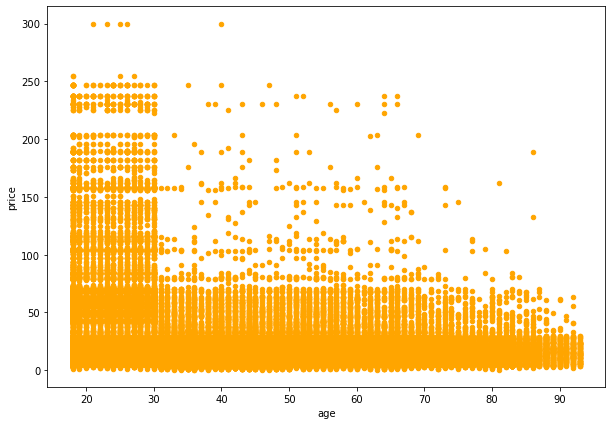

In [26]:
scatterplot_age_prix = df_ventes.plot.scatter(x='age', y='price', color='orange', figsize=(10,7))
scatterplot_age_prix.figure.savefig('price_categorie.png')

Si on veut connaitre en plus la catégorie : 

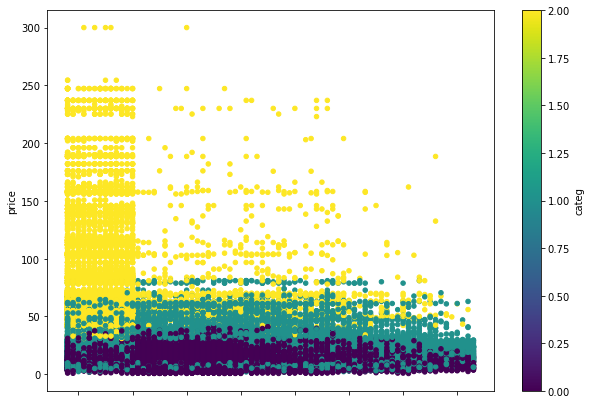

In [27]:
scatterplot_age_prix_categ = df_ventes.plot.scatter(x='age',y='price', c='categ',colormap='viridis', figsize=(10,7))
scatterplot_age_prix_categ.figure.savefig('price__age_categorie.png')

# Mission n° 3 - corrélation

Pour les corrélations, pas besoin d'effectuer en entier les tests (chi-2, ANOVA, etc.). Seul le calcul des statistiques de test est demandé (\(r^2, \eta^2, \xi_n\)).

In [28]:
x = df_ventes['price']
y = df_ventes['age']
print(stats.shapiro(x))
print(stats.shapiro(y))

ShapiroResult(statistic=0.5536524057388306, pvalue=0.0)
ShapiroResult(statistic=0.9716253876686096, pvalue=0.0)


C:\Users\jb-14\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Quand on fait un test de Shapiro, on a le warning suivant : 'UserWarning: p-value may not be accurate for N > 5000.' On n'obtient donc pas de p-value.

Le théorème central limite (aussi appelé théorème limite central, théorème de la limite centrale ou théorème de la limite centrée) établit la convergence en loi de la somme d'une suite de variables aléatoires vers la loi normale. Intuitivement, ce résultat affirme qu'une somme de variables aléatoires indépendantes et identiquement distribuées tend (le plus souvent) vers une variable aléatoire gaussienne.

Ici notre DataFrame contient environ 300 000 lignes. On considèrera donc qu'on pourra utiliser les tests de chi², ANOVA et autre grâce au théorême central limite.

## Corrélation entre le sexe des clients et les catégories de produits achetés - Chi²

In [29]:
#le test de chi2 se fait sur 2 variables qualitatives
#donc dans notre df_ventes, ça se fait sur le sexe et la categorie

In [30]:
df_chi2 = df_ventes.copy()
df_chi2 = df_chi2[['sex', 'categ']]

In [31]:
subset_contingence = df_chi2[['sex', 'categ']].pivot_table(index='sex', columns='categ', aggfunc=len,margins=True,margins_name='Total')
subset_contingence

categ,0.0,1.0,2.0,Total
sex,,,,
f,93668,53774,7683,155125
m,86784,48851,7193,142828
Total,180452,102625,14876,297953


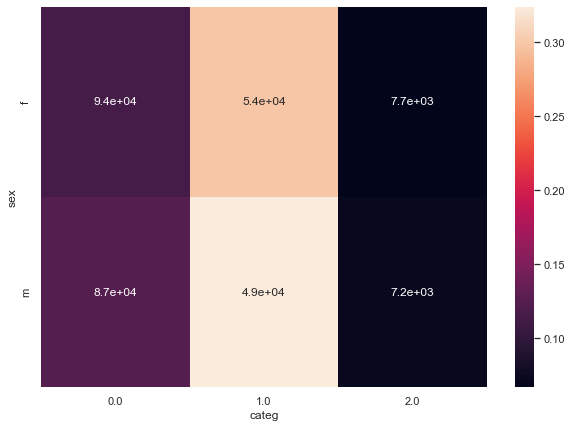

In [32]:
tx = subset_contingence.loc[:,["Total"]]
ty = subset_contingence.loc[["Total"],:]
n = len(df_ventes)
indep = tx.dot(ty) / n

c = subset_contingence.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.set(rc={"figure.figsize":(10, 7)})
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])

fig.savefig('correlation_sexe_categorie.png')

Pas de corrélation entre le sexe et la catégorie

## Analyse des corrélations en prenant en compte l'âge

Pour répondre aux 4 questions suivantes, on a besoin de calculer le panier moyen par client, le nombre de commandes par client ainsi que le cumul de commandes par client.

In [33]:
df_ventes_tempo4 = df_ventes.copy()
df_ventes_tempo4 = df_ventes_tempo4.groupby(['client_id','sex','age'])[['client_id', 'price']].agg(['sum','mean','count','nunique']).reset_index()
df_ventes_tempo4.tail(3)

client_id sex   age    price                         
                              sum       mean count nunique
8592     c_997   f  28.0   514.90  23.404545    22      21
8593     c_998   m  21.0  1527.69  54.560357    28      27
8594     c_999   m  58.0   297.02  14.143810    21      14

### Corrélation entre l'âge des clients et le montant total des achats

In [34]:
#age: variable quantitative continue qu'on peut discrétiser(ici directement discrète)
#age : déjà calculé

#montant total des achats : variable quantitative continue
#montant total: faire un group by par client id

#regression lineaire
#scatter plot
#Le coefficient de corrélation de Pearson ou coefficient de corrélation linéaire 
#permet de compléter numériquement l'analyse de la corrélation.

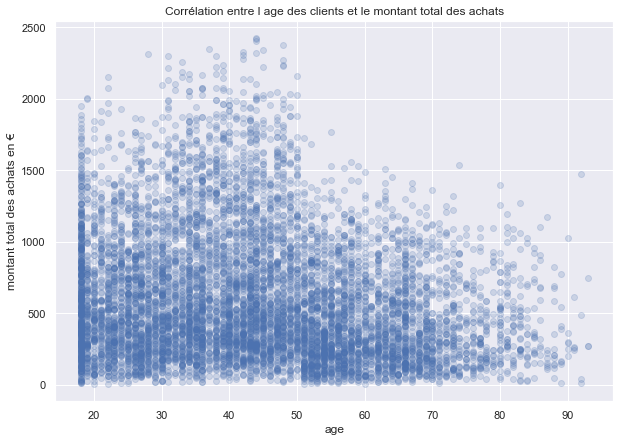

In [35]:
plt.figure(figsize=(10,7))
plt.axes()
#N = len(df_ventes_tempo3)
x = df_ventes_tempo4['age']
y = df_ventes_tempo4['price']['sum']
#colors = np.random.rand(N)

plt.scatter(x, y, alpha=0.2)
plt.title('Corrélation entre l age des clients et le montant total des achats')
plt.xlabel('age')
plt.ylabel('montant total des achats en €')
plt.show()

In [36]:
#Le résultat étant peu lisible, on va utiliser les boits à moustache comme dans ce cours:
#https://openclassrooms.com/fr/courses/7410486-nettoyez-et-analysez-votre-jeu-de-donnees/7428368-analysez-la-correlation-entre-deux-variables-quantitatives

les différentes tranches d âge sont [ 5. 15. 25. 35. 45. 55. 65. 75. 85. 95.]


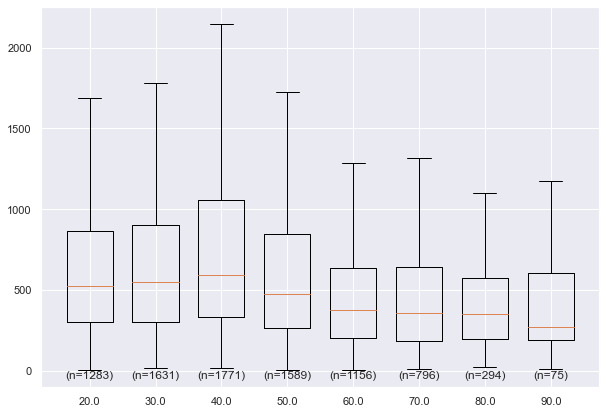

In [37]:
#on crée d'abord des tranches
taille_classe = 10 #c'est notre setp dans la formule du dessous
tranches = np.arange(0, max(df_ventes_tempo4['age']), taille_classe)
tranches += taille_classe/2
indices = np.digitize(df_ventes_tempo4['age'], tranches) # tableau qui associe chaque tranche d'âge à son numéro de classe
print('les différentes tranches d âge sont {}'.format(tranches))

groupes = []
#je crée un montant total pour pouvoir utiliser la boucle for ci dessous
df_ventes_tempo4['montant_total'] = df_ventes_tempo4['price']['sum']

#le code ci dessous est issu du cours
for ind, tr in enumerate(tranches): # pour chaque tranche, ind reçoit le numéro de tranche et tr la tranche en question
    montant_total = df_ventes_tempo4.loc[indices==ind,'montant_total'] # sélection des individus de la tranche ind
    if len(montant_total) > 0:
        g = {
            'valeurs': montant_total,
            'centre_classe': tr-(taille_classe/2),
            'taille': len(montant_total),
            'quartiles': [np.percentile(montant_total,p) for p in [25,50,75]]
        }
        groupes.append(g)

plt.figure(figsize=(10,7))
        
# affichage des boxplots
plt.boxplot([g["valeurs"] for g in groupes],
            positions= [g["centre_classe"] for g in groupes], # abscisses des boxplots
            showfliers= False, # on ne prend pas en compte les outliers
            widths= taille_classe*0.7) # largeur graphique des boxplots

# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["centre_classe"],0,"(n={})".format(g["taille"]),horizontalalignment='center',verticalalignment='top')     
plt.show()

fig.savefig('boxplot_age_montant_total.png')

#### Coefficient de Pearson et la covariance

In [38]:
#x = df_ventes_tempo4['age']
#y = df_ventes_tempo4['price']['sum']
import scipy.stats as st

print(st.pearsonr(x,y)[0])
print(np.cov(x,y,ddof=0)[1,0])

-0.18066767779454013
-1335.2046951354014


Le coeff de Pearson est négative. Pour rappel, le coefficient de corrélation de Pearson entre deux variables est égal à l’espérance du produit des variables préalablement centrées-réduites. C’est aussi égal à la covariance de ces deux variables centrées-réduites.

On a donc une corrélation négative

### Corrélation entre l'âge des clients et la fréquence d'achat

In [39]:
df_ventes_tempo4['frequence_commande'] = (df_ventes_tempo4['price']['count'])/11

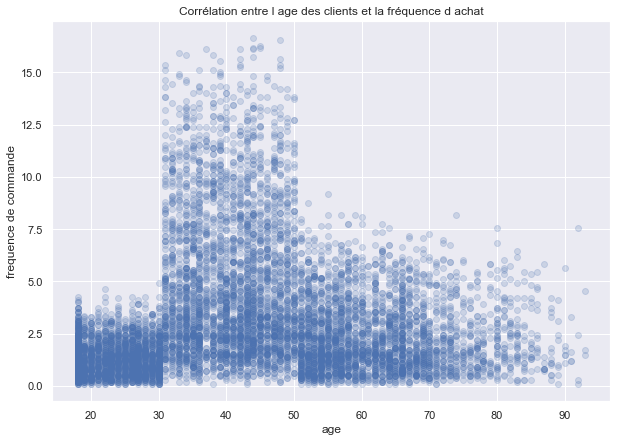

In [40]:
plt.figure(figsize=(10,7))
plt.axes()
#N = len(df_ventes_tempo3)
x = df_ventes_tempo4['age']
y = df_ventes_tempo4['frequence_commande']
#colors = np.random.rand(N)

plt.scatter(x, y, alpha=0.2)
plt.title('Corrélation entre l age des clients et la fréquence d achat')
plt.xlabel('age')
plt.ylabel('frequence de commande')
plt.show()

fig.savefig('correlation_frequence_achat.png')

Graphiquement, on peut remarquer que l'on a 3 groupes distincts. On va émettre l'hypothèse que la fréquence d'achat est corrélée à ces groupes là.

In [41]:
df_ventes_tempo4['categorie_age'] = pd.cut(df_ventes_tempo4['age'],
      bins=[ 5, 30, 50, 95],
      labels=['5-30','31-50', '51-95'])

df_ventes_tempo4

client_id sex   age    price                          montant_total  \
                              sum       mean count nunique                 
0          c_1   m  67.0   292.66  15.403158    19      17        292.66   
1         c_10   m  66.0   586.18  20.935000    28      24        586.18   
2        c_100   m  30.0   222.87  37.145000     6       6        222.87   
3       c_1000   f  56.0   970.03  17.636909    55      40        970.03   
4       c_1001   m  40.0  1056.86  19.215636    55      48       1056.86   
...        ...  ..   ...      ...        ...   ...     ...           ...   
8590     c_995   m  67.0   119.08  14.885000     8       8        119.08   
8591     c_996   f  52.0   725.61  17.697805    41      36        725.61   
8592     c_997   f  28.0   514.90  23.404545    22      21        514.90   
8593     c_998   m  21.0  1527.69  54.560357    28      27       1527.69   
8594     c_999   m  58.0   297.02  14.143810    21      14        297.02   

     frequence_commande categorie_age  
                                       
0              1.727273         51-95  
1              2.545455         51-95  
2              0.545455          5-30  
3              5.000000         51-95  
4              5.000000         31-50  
...                 ...           ...  
8590           0.727273         51-95  
8591           3.727273         51-95  
8592           2.000000          5-30  
8593           2.545455          5-30  
8594           1.909091         51-95  

[8595 rows x 10 columns]

In [42]:
x = df_ventes_tempo4['age']
y = df_ventes_tempo4['frequence_commande']
import scipy.stats as st

print(st.pearsonr(x,y)[0])
print(np.cov(x,y,ddof=0)[1,0])

0.03566752403045582
1.7328662101093424


Différence d'âge de 3% par année de vie du client. Donc on a une corrélation entre l'âge et la fréquence d'achat.

### Corrélation entre l'âge des clients et la taille du panier moyen

In [43]:
df_taille_panier_moyen = df_ventes[['client_id','session_id','age','id_prod']].groupby(['client_id','session_id','age']).count().reset_index()
df_taille_panier_moyen.head(3)

,client_id,session_id,age,id_prod
0,c_1,s_114737,67.0,5
1,c_1,s_120172,67.0,2
2,c_1,s_134971,67.0,1


In [44]:
df_taille_panier_moyen['tranches_age'] = pd.cut(df_taille_panier_moyen['age'],
      bins=[ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95],
      labels=['5-15','16-25', '26-35','36-45','46-55','56-65','66-75','76-85','86-95'])

df_taille_panier_moyen

,client_id,session_id,age,id_prod,tranches_age
0,c_1,s_114737,67.0,5,66-75
1,c_1,s_120172,67.0,2,66-75
2,c_1,s_134971,67.0,1,66-75
3,c_1,s_136532,67.0,1,66-75
4,c_1,s_139610,67.0,1,66-75
...,...,...,...,...,...
149220,c_999,s_87567,58.0,1,56-65
149221,c_999,s_88239,58.0,1,56-65
149222,c_999,s_89648,58.0,1,56-65
149223,c_999,s_92374,58.0,1,56-65


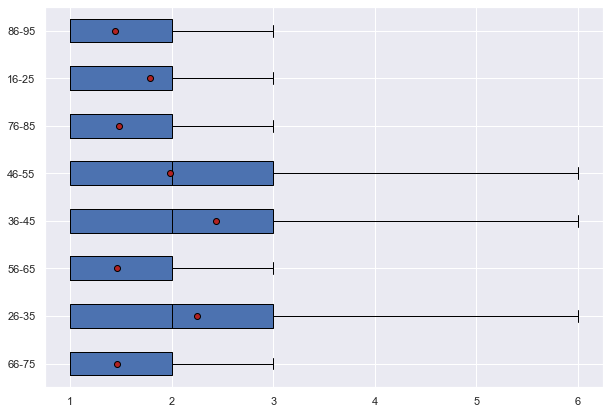

In [45]:
modalites = df_taille_panier_moyen['tranches_age'].unique()
groupes = []
for m in modalites:
    groupes.append(df_taille_panier_moyen[df_taille_panier_moyen['tranches_age']==m]['id_prod'])
    
# Propriétés graphiques 
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.figure(figsize=(10,7))   
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

fig.savefig('boxplot_correlation_age_clients_taille_panier_moyen.png')

In [46]:
F = 'tranches_age'
G = 'id_prod'
eta_squared(df_taille_panier_moyen[F],df_taille_panier_moyen[G])

0.08665549979310155

Ici on peut observer une correlation entre l'age des clients et la taille du panier moyen

### Corrélation entre l'âge des clients et les catégories de produits achetés

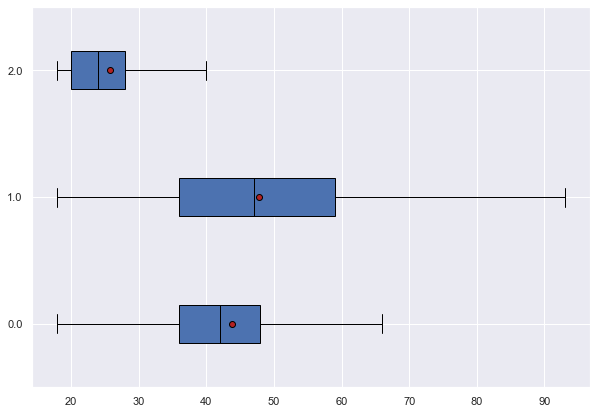

In [47]:
subset_price_categ = df_ventes
modalites = subset_price_categ['categ'].unique()
groupes = []
for m in modalites:
    groupes.append(subset_price_categ[subset_price_categ['categ']==m]['age'])
    
# Propriétés graphiques 
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.figure(figsize=(10,7))     
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

fig.savefig('boxplot_correlation_age_clients_categorie_produits.png')

In [48]:
eta_squared(subset_price_categ['categ'],subset_price_categ['age'])

0.11222051143414485

Ici on peut observer une correlation entre l'age des clients et les catégories de produits achetées